# Iris Flower Classification:

The iris flower classification problem is a well-known example in the field of machine learning. The objective is to categorize iris flowers into three different species (Setosa, Versicolor, or Virginica) based on their sepal and petal length and width measurements. The iris data set comprises fifty instances of each species, making a total of one hundred and fifty instances in the dataset.

## Importing Libraries

In [ ]:
import numpy as np                     
import pandas as pd                    
import seaborn as sns
import matplotlib.pyplot as plt       
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Reading the dataset into a DataFrame

In [ ]:
iris = pd.read_csv("Iris.csv")

In [ ]:
iris.head()    #Prints first 5 rows of the dataframe

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()   #Prints the column details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe()   #Prints the value of aggregate functions of each column

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.columns   #Prints the list of columns of the dataset

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
iris.shape    #Prints the shape of the dataset

(150, 5)

In [ ]:
iris.isnull().sum()   #To check the null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Data Visualization

### Box Plot

<Axes: xlabel='sepal_length', ylabel='species'>

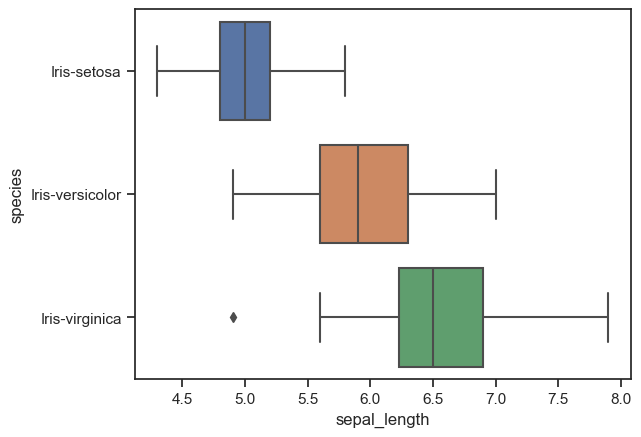

In [ ]:
sns.boxplot(x="sepal_length",y="species",data=iris)

### Scatter Plot

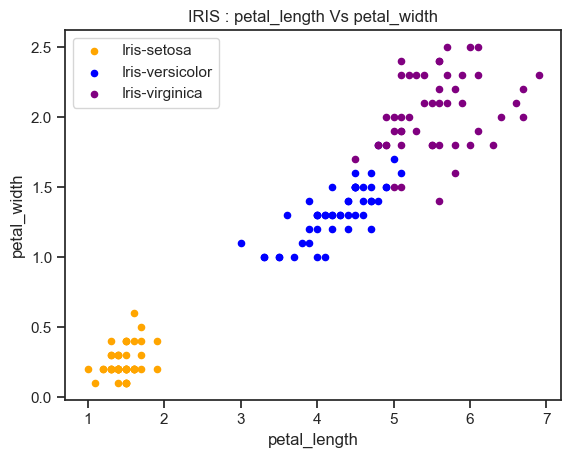

In [ ]:
plot=iris[iris.species=="Iris-setosa"].plot.scatter(x="petal_length",y="petal_width",color='orange',label="Iris-setosa")
iris[iris.species=="Iris-versicolor"].plot.scatter(x="petal_length",y="petal_width",color='blue',label="Iris-versicolor",ax=plot)
iris[iris.species=="Iris-virginica"].plot.scatter(x="petal_length",y="petal_width",color='purple',label="Iris-virginica",ax=plot)

plt.title("IRIS : petal_length Vs petal_width")
plt.show()

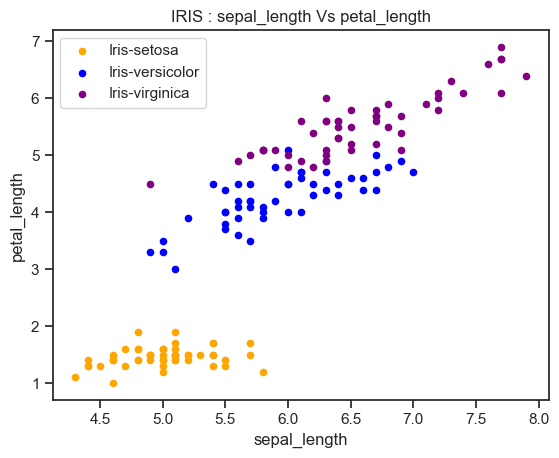

In [ ]:
plot=iris[iris.species=="Iris-setosa"].plot.scatter(x="sepal_length",y="petal_length",color='orange',label="Iris-setosa")
iris[iris.species=="Iris-versicolor"].plot.scatter(x="sepal_length",y="petal_length",color='blue',label="Iris-versicolor",ax=plot)
iris[iris.species=="Iris-virginica"].plot.scatter(x="sepal_length",y="petal_length",color='purple',label="Iris-virginica",ax=plot)

plt.title("IRIS : sepal_length Vs petal_length")
plt.show()

### Strip Plot

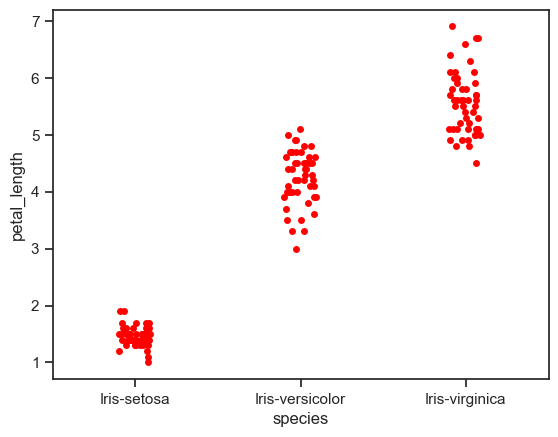

In [ ]:
box = sns.stripplot(x="species", y="petal_length", data=iris, jitter=True, edgecolor="black",color='red')

### Pair Plot

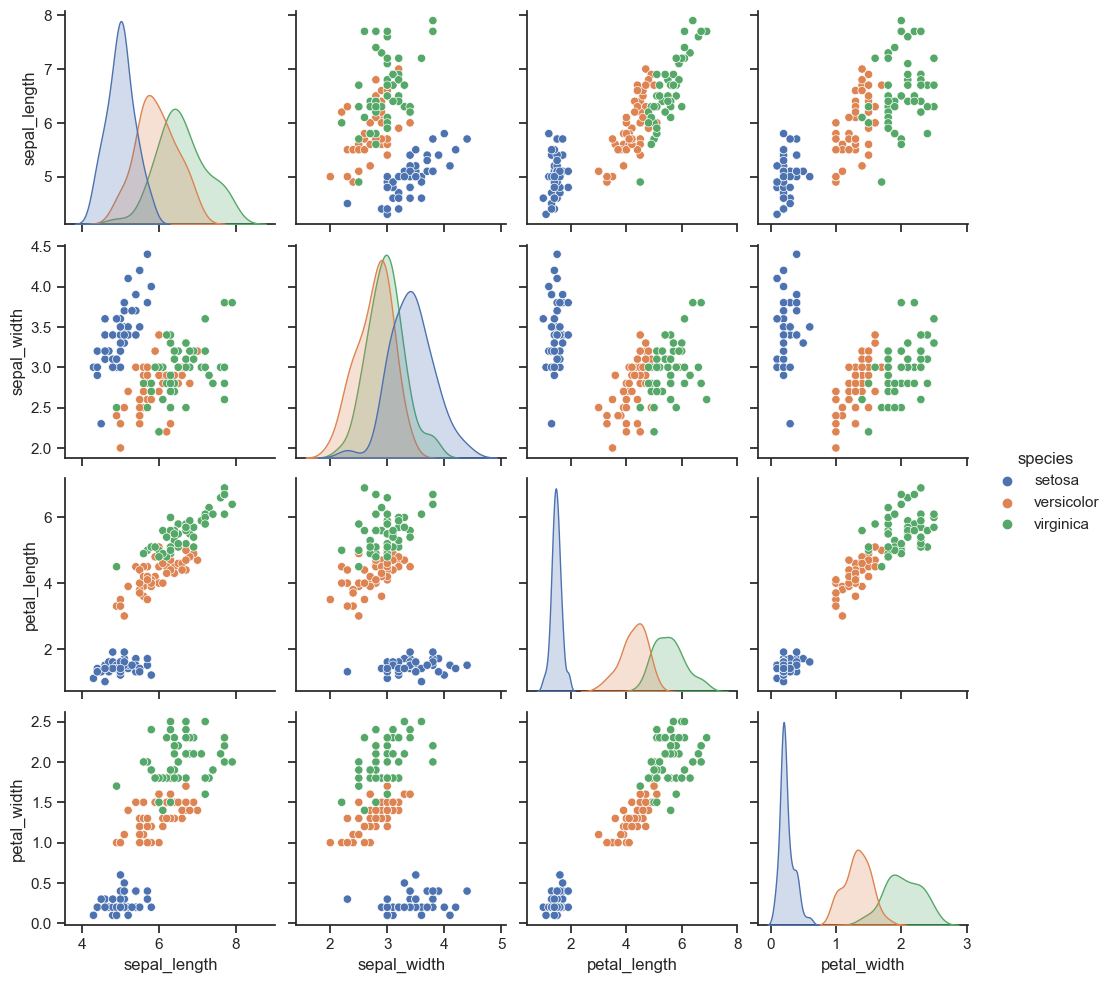

In [ ]:
sns.set_theme(style="ticks")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

### Historgram

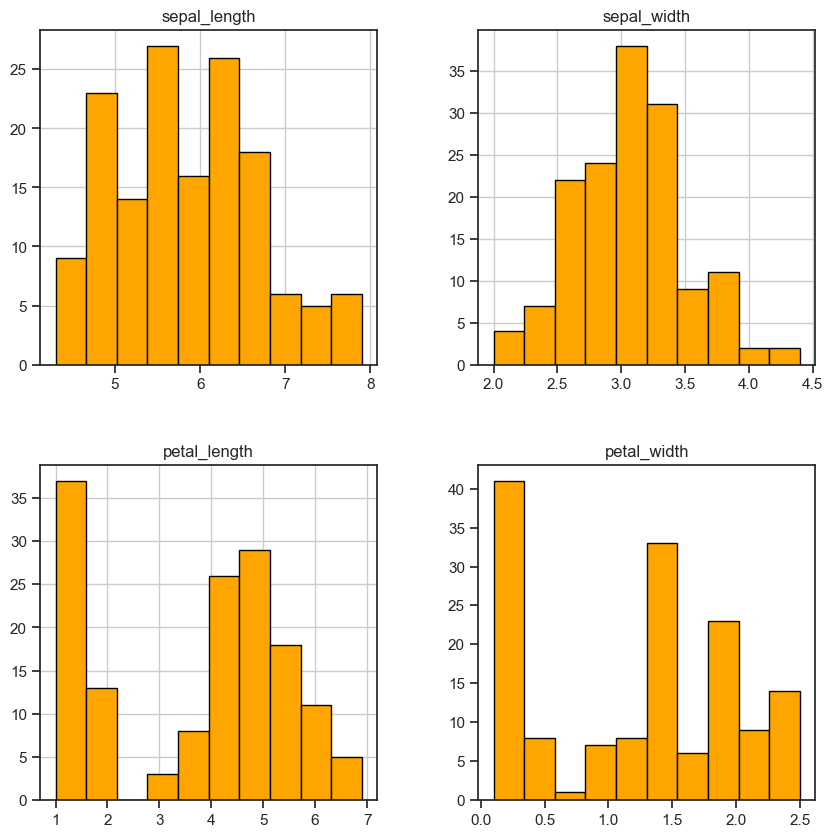

In [ ]:
iris.hist(color='orange',edgecolor='black',figsize=(10,10))
plt.grid()
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
x = iris.drop('species', axis=1)
y= iris.species

## Creating a Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)

## Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(x,y)
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x)

### Accuracy Score

In [ ]:
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


### Score of Test Data

In [ ]:
logreg.score(x_test,y_test)

0.9833333333333333

### Score Of Train Data

In [ ]:
logreg.score(x_train,y_train)

0.9666666666666667

## SVM Support Vector Machines

In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [ ]:
svm = SVC(gamma='auto')
svm.fit(x_train, y_train)
prediction = svm.predict(x_test)
print(f'Accuracy of SVM: {accuracy_score(y_test, prediction)}')
print(f'Report of SVM: \n {classification_report(y_test, prediction)}')

Accuracy of SVM: 0.9833333333333333
Report of SVM: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.95      0.98        21
 Iris-virginica       0.95      1.00      0.97        19

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60

